# fix data

In [60]:
def convert_to_floats(value):
    if value[:2] == '[[':
        nested_list = ast.literal_eval(value)
        return [item[0] for item in nested_list]
    return value  # Return the original value if not a string

def printer(value):
    if value[:2] == '[[':
        print(value)
        print()
    return value


df = pd.read_csv('data.csv')


df['probability'] = df['probability'].apply(convert_to_floats)

df.to_csv('data.csv', index=False)

# Plot thermal noisy data

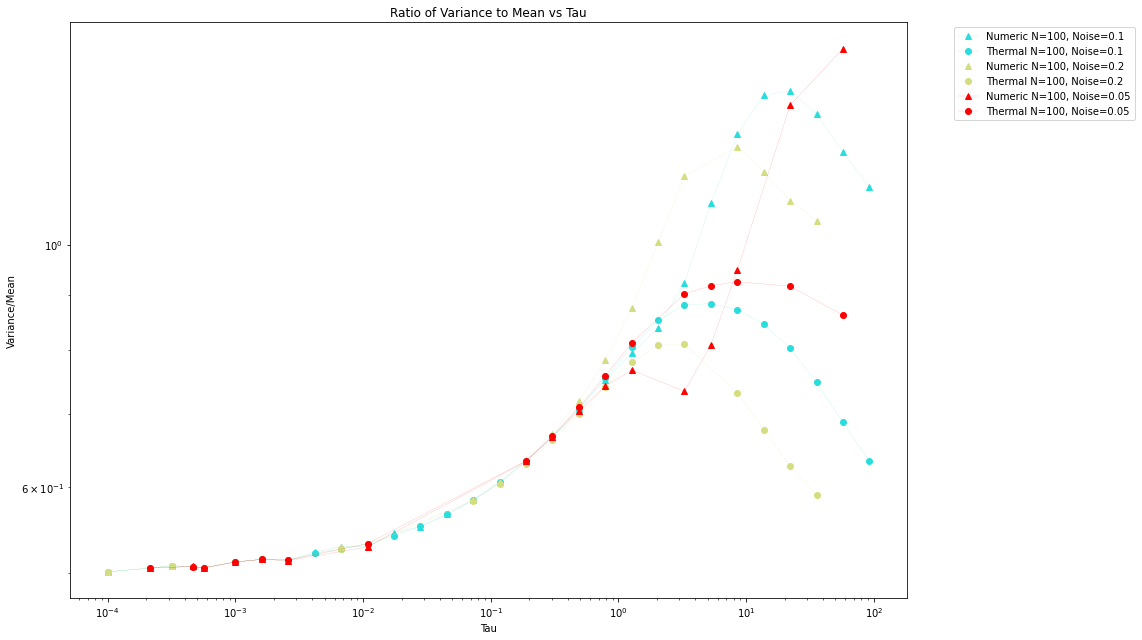

In [46]:
# Load the data from the CSV file
N = 100
data = get_data_in_range(N, 0, 100, 0.05, 0.2)
data = data[(data['type'] == 'numeric') | (data['type'] == 'thermal')]
plt.figure(figsize=(16, 9))

# Get unique noise levels
noise_levels = data['noise'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(noise_levels) + 1)) # type: ignore

# Iterate over noise levels for Numeric data
for idy, noise in enumerate(noise_levels):
    # Get the data in the tau range for the current N and noise
    num_data = data[(data['type'] == 'numeric') & (data['noise'] == noise)]
    thermal_data = data[(data['type'] == 'thermal') & (data['noise'] == noise)]

    # Calculate the ratio of the second cumulant to the first (variance/mean) for numeric data
    num_ratio = num_data['variance'] / num_data['mean']
    thermal_ratio = thermal_data['variance'] / thermal_data['mean']

    # Plot numeric data with different colors and labels
    plt.plot(num_data['tau'], num_ratio, color=colors[idy+1], label=f'Numeric N={N}, Noise={noise}', marker='^', linewidth=0.1, markersize=6)
    plt.plot(thermal_data['tau'], thermal_ratio, color=colors[idy+1], label=f'Thermal N={N}, Noise={noise}', marker='o', linewidth=0.1, markersize=6)
    
    # Set labels, title, and legend
plt.xlabel('Tau')
plt.ylabel('Variance/Mean')
plt.title('Ratio of Variance to Mean vs Tau')

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xscale('log')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


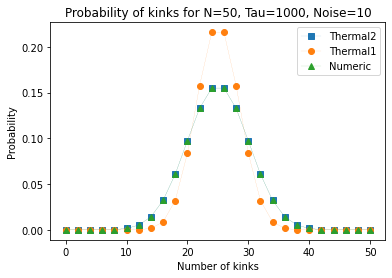

In [6]:
# Load the data from the CSV file
N = 50
tau = 1000
noise = 10
data = get_data_in_range(N, tau, tau , noise, noise)
num_prob = np.array(ast.literal_eval(data[data['type'] == 'numeric']['probability'].iloc[0])).flatten()
thermal_prob1 = np.array(ast.literal_eval(data[data['type'] == 'thermal1']['probability'].iloc[0])).flatten()
thermal_prob2 = np.array(ast.literal_eval(data[data['type'] == 'thermal2']['probability'].iloc[0])).flatten()
kinks = [i*2 for i in range(len(num_prob))]
plt.plot(kinks, thermal_prob2, label='Thermal2', marker='s', linewidth=0.1, markersize=6)
plt.plot(kinks, thermal_prob1, label='Thermal1', marker='o', linewidth=0.1, markersize=6)
plt.plot(kinks, num_prob, label='Numeric', marker='^', linewidth=0.1, markersize=6)
plt.xlabel('Number of kinks')
plt.ylabel('Probability')
plt.title(f'Probability of kinks for N={N}, Tau={tau}, Noise={noise}')
plt.legend()
# plt.xlim(-1, 30)
name = f'kinks_prob_{N}_{tau}_{noise}.svg'
#plt.savefig(name)
plt.show()

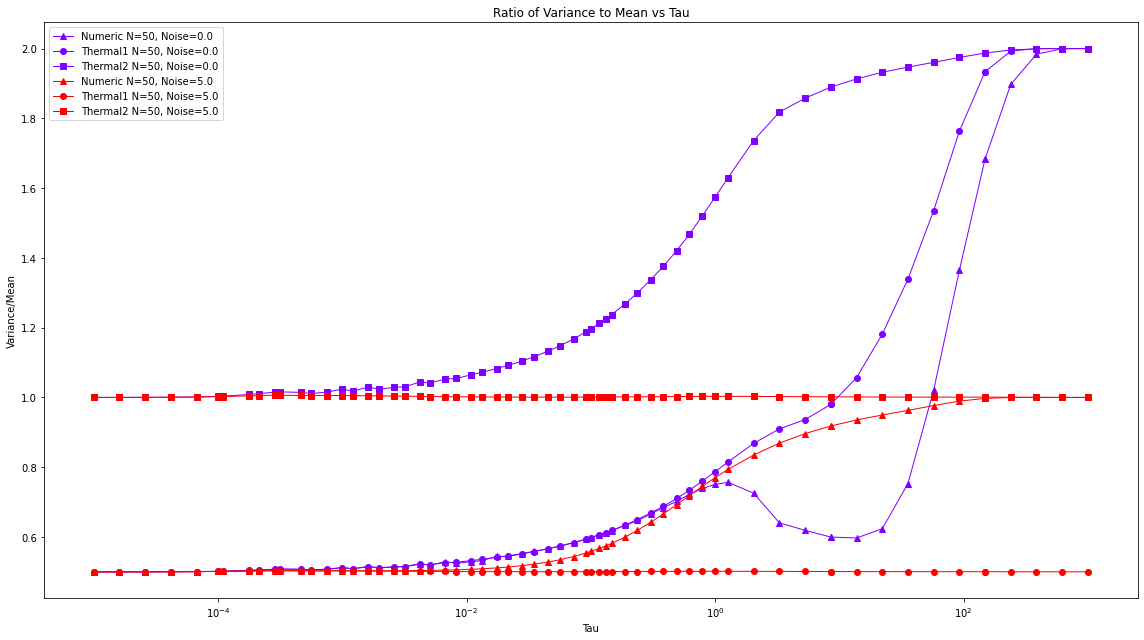

In [40]:
# Load the data from the CSV file
N = 50
data = get_data_in_range(N, 0, 100000, 0, 51)
data = data[(data['noise'] == 0) | (data['noise'] == 5)]
data = data[(data['type'] == 'numeric') | (data['type'] == 'thermal1') | (data['type'] == 'thermal2')]
plt.figure(figsize=(16, 9))

# Get unique noise levels
noise_levels = data['noise'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(noise_levels))) # type: ignore

# Iterate over noise levels for Numeric data
for idy, noise in enumerate(noise_levels):
    # Get the data in the tau range for the current N and noise
    num_data = data[(data['type'] == 'numeric') & (data['noise'] == noise)]
    thermal_data1 = data[(data['type'] == 'thermal1') & (data['noise'] == noise)]
    thermal_data2 = data[(data['type'] == 'thermal2') & (data['noise'] == noise)]

    # Calculate the ratio of the second cumulant to the first (variance/mean) for numeric data
    num_ratio = num_data['variance'] / num_data['mean']
    thermal_ratio1 = thermal_data1['variance'] / thermal_data1['mean']
    thermal_ratio2 = thermal_data2['variance'] / thermal_data2['mean']

    # Plot numeric data with different colors and labels
    plt.plot(num_data['tau'], num_ratio, color=colors[idy], label=f'Numeric N={N}, Noise={noise}', marker='^', linewidth=1, markersize=6)
    plt.plot(thermal_data1['tau'], thermal_ratio1, color=colors[idy], label=f'Thermal1 N={N}, Noise={noise}', marker='o', linewidth=1, markersize=6)
    plt.plot(thermal_data2['tau'], thermal_ratio2, color=colors[idy], label=f'Thermal2 N={N}, Noise={noise}', marker='s', linewidth=1, markersize=6)
    
    # Set labels, title, and legend
plt.xlabel('Tau')
plt.ylabel('Variance/Mean')
plt.title('Ratio of Variance to Mean vs Tau')

# Place the legend outside of the plot
plt.legend()

plt.xscale('log')
#plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
data = pd.read_csv('data.csv')


Ns = data['N'].unique()

taus = data['tau'].unique()
noises = data['noise'].unique()



print(Ns)
print(taus)
print(noises)

[ 50 100]
[1.00000000e-05 1.60000000e-05 2.60000000e-05 4.20000000e-05
 6.80000000e-05 1.00000000e-04 1.10000000e-04 1.78000000e-04
 2.15000000e-04 2.87000000e-04 3.16000000e-04 4.64000000e-04
 5.62000000e-04 7.50000000e-04 1.00000000e-03 1.21200000e-03
 1.61000000e-03 1.95700000e-03 2.59300000e-03 3.16200000e-03
 4.17500000e-03 5.10900000e-03 6.72300000e-03 8.25400000e-03
 1.08260000e-02 1.33350000e-02 1.74330000e-02 2.15440000e-02
 2.80720000e-02 3.48070000e-02 4.52040000e-02 5.62340000e-02
 7.27900000e-02 9.08520000e-02 1.00000000e-01 1.17210000e-01
 1.32000000e-01 1.46780000e-01 1.88739000e-01 2.37137000e-01
 3.03920000e-01 3.83119000e-01 4.89390000e-01 6.18966000e-01
 7.88046000e-01 1.00000000e+00 1.26896100e+00 2.04336000e+00
 3.29034500e+00 5.29831700e+00 8.53167900e+00 1.37382380e+01
 2.21221630e+01 3.56224790e+01 5.73615250e+01 9.23670860e+01
 1.48735211e+02 1.48735211e+02 2.39502662e+02 3.85662042e+02
 6.21016942e+02 1.00000000e+03 2.39502662e+02]
[0.0e+00 1.0e-03 1.0e-02 5.0

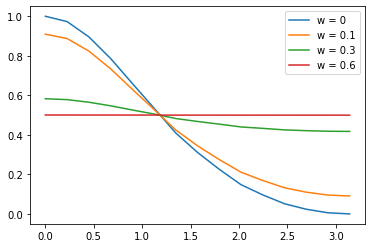

In [5]:
ks = np.linspace(0, np.pi, 15)
tau = 0.1
x = np.array([[0,1],[1,0]])
for w in [0, 0.1,0.3, 0.6]:
    pks = calk_noisy_pk(ks, tau, w, x)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

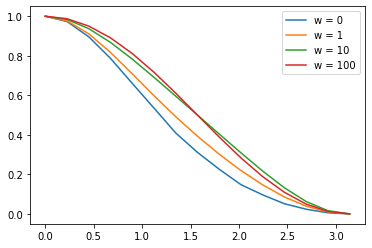

In [25]:
ks = np.linspace(0, np.pi, 15)
tau = 0.1
z = np.matrix([[1,0],[0,-1]])
for w in [0, 1, 10 ,100]:
    pks = calk_noisy_pk(ks, tau, w, z)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

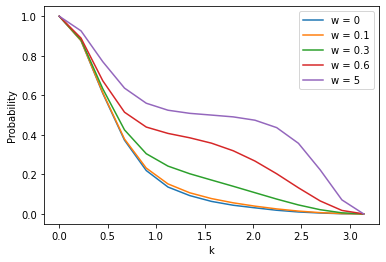

In [28]:
ks = np.linspace(0, np.pi, 15)
tau = 1
z = np.matrix([[1,0],[0,-1]])
for w in [0, 0.1,0.3, 0.6, 5]:
    pks = calk_noisy_pk(ks, tau, w, z)
    plt.plot(ks,pks, label=f'w = {w}')
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()
plt.show()

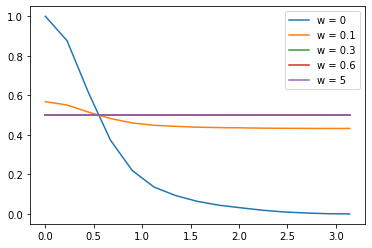

In [7]:
ks = np.linspace(0, np.pi, 15)
tau = 1
y = np.matrix([[0,1j],[1j,0]])
for w in [0, 0.1,0.3, 0.6, 5]:
    pks = calk_noisy_pk(ks, tau, w, y)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

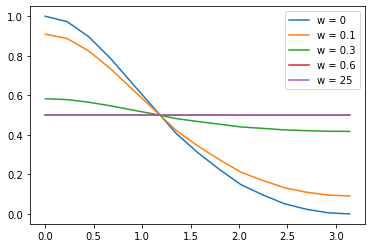

In [2]:
ks = np.linspace(0, np.pi, 15)
tau = 0.1
y = np.matrix([[0,1j],[1j,0]])
for w in [0, 0.1,0.3, 0.6, 25]:
    pks = calk_noisy_pk(ks, tau, w, y)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

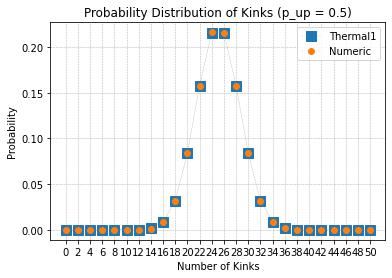

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 50          # Number of spins
num_runs = 100000  # Number of simulation runs
p_up = 0.5  # Probability of a spin being "up"

def count_kinks(lattice):
    """Count the number of kinks/domain walls in the lattice."""
    differences = np.sum(lattice != np.roll(lattice, -1))
    return differences

# Store kinks for each simulation run
kinks_list = []

for _ in range(num_runs):
    # Initialize 1D lattice with spins (+1 with probability p_up, -1 with probability 1-p_up)
    lattice = np.random.choice([1, -1], size=L, p=[p_up, 1-p_up])
    
    # Calculate the number of kinks and store
    kinks_list.append(count_kinks(lattice))

# Calculate the normalized probability for each kink count
kink_counts = np.arange(0, L + 1, 2)  # Possible kink counts: 0, 2, ..., L
probabilities = [kinks_list.count(kink) / num_runs for kink in kink_counts]

# Plot as a line


# Load the data from the CSV file
N = 50
tau = 1000
noise = 10
data = get_data_in_range(N, tau, tau , noise, noise)
thermal_prob1 = np.array(ast.literal_eval(data[data['type'] == 'thermal1']['probability'].iloc[0])).flatten()
#thermal_prob2 = np.array(ast.literal_eval(data[data['type'] == 'thermal2']['probability'].iloc[0])).flatten()
kinks = [i*2 for i in range(len(thermal_prob1))]
#plt.plot(kinks, thermal_prob2, label='Thermal2', marker='s', linewidth=0.1, markersize=6)
plt.plot(kinks, thermal_prob1, label='Thermal1', marker='s', linewidth=0.1, markersize=10)
plt.plot(kink_counts, probabilities, marker='o', linestyle='-', label='Numeric', linewidth=0.1, markersize=6)


plt.xlabel('Number of Kinks')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Kinks (p_up = {p_up})')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(kink_counts)  # Set x-axis ticks to show each possible kink count
plt.legend()
# plt.xlim(-1, 30)
name = f'kinks_prob_{N}_{tau}_{noise}.svg'
#plt.savefig(name)
plt.show()


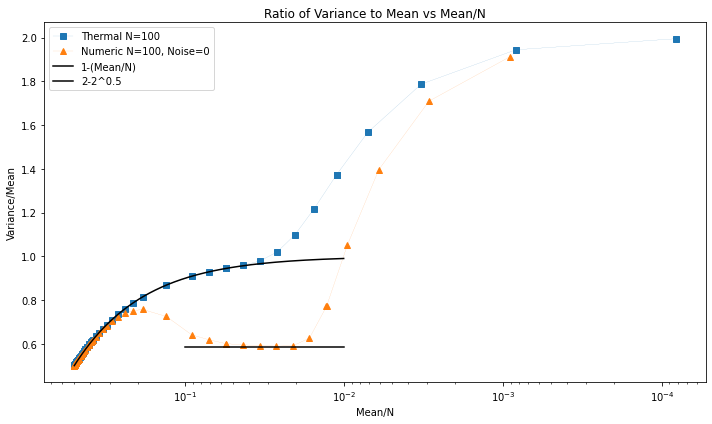

In [20]:
plt.figure(figsize=(10, 6))

N = 100
noise = 0
data = get_data_in_range(N, 0, 1000000 , noise, noise)

# Split the data into thermal
therm_data = data[data['type'] == 'thermal1']

# Calculate the ratio of the second cumulant to the first (variance/mean) for thermal data
therm_ratio = therm_data['variance'] / therm_data['mean']

# Plot thermal data
plt.plot(therm_data['mean']/N, therm_ratio, label=f'Thermal N={N}', marker='s', linewidth=0.1, markersize=6)

# Get the data for the current N and noise
num_data = data[(data['type'] == 'numeric') & (data['noise'] == noise)]

# Calculate the ratio of the second cumulant to the first (variance/mean) for numeric data
num_ratio = num_data['variance'] / num_data['mean']

# Plot numeric data
plt.plot(num_data['mean']/N, num_ratio, label=f'Numeric N={N}, Noise={noise}', marker='^', linewidth=0.1, markersize=6)

# Add line 1-(mean/N)
x_values = np.linspace(min(therm_data['mean']/N), max(therm_data['mean']/N), num=1000)
y_values = 1 - x_values[x_values > 10**-2]
plt.plot(x_values[x_values > 10**-2], y_values, label='1-(Mean/N)', color='black')
plt.plot(np.logspace(-1,-2,5), [2-(2**0.5)]*5, label='2-2^0.5', color='black')

# Set labels, title, and legend
plt.xlabel('Mean/N')
plt.ylabel('Variance/Mean')
plt.title('Ratio of Variance to Mean vs Mean/N')

# Place the legend outside of the plot
plt.legend()

plt.xscale('log')

# Flip the x-axis
plt.xlim(plt.xlim()[::-1])

# Display the plot
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, amplitude_damping_error, phase_damping_error,
    depolarizing_error, thermal_relaxation_error)
from collections import defaultdict

def simulate_with_noise(qubits, numshots, steps, damping=0.0, dephazing=0.0, depolarizing=0.0, angle_noise= 0.0):

    # Quantum Circuit
    circuit = QuantumCircuit(qubits, qubits)
    
    # Create the original circuit
    for i in range(qubits):
        circuit.h(i)
    angles = (np.pi/2) * np.array(range(1, steps+1)) / (steps+1)
    for theta in angles:
        theta += angle_noise * np.random.randn()
        alpha = -np.cos(theta)
        beta = -np.sin(theta)
        for i in range(qubits - 1):
            circuit.rz(beta, i)
            circuit.rz(beta, i + 1)
            circuit.cp(-2 * beta, i, i + 1)
        circuit.rz(beta, qubits-1)
        circuit.rz(beta, 0)
        circuit.cp(-2 * beta, qubits-1, 0)
        for i in range(qubits):
            circuit.rx(alpha, i)
    for i in range(qubits):
        circuit.measure(i, i)
        
    # Noise Model
    noise_model = NoiseModel()
    if damping > 0:
        damping_error = amplitude_damping_error(damping)
        noise_model.add_all_qubit_quantum_error(damping_error, ['rx', 'rz'])
    if dephazing > 0:
        dephazing_error = phase_damping_error(dephazing)
        noise_model.add_all_qubit_quantum_error(dephazing_error, ['rx', 'rz'])
    if depolarizing > 0:
        depolarizing_err_1 = depolarizing_error(depolarizing, 1)
        noise_model.add_all_qubit_quantum_error(depolarizing_err_1, ['h','rx', 'rz'])
        depolarizing_err_2 = depolarizing_error(depolarizing, 2)
        noise_model.add_all_qubit_quantum_error(depolarizing_err_2, [ 'cp'])
        
    # Simulation
    simulator = AerSimulator(noise_model=noise_model)
    transpiled_circuits = transpile(circuit, simulator)
    result = simulator.run(transpiled_circuits).result()
    counts = result.get_counts()

    # Count kinks
    def count_kinks(bitstring):
        return sum(1 for i in range(len(bitstring)) if bitstring[i] != bitstring[i-1])

    kinks_count = defaultdict(int)
    for bitstring, count in counts.items():
        kinks_count[count_kinks(bitstring)] += count

    # Normalize the counts to get probabilities
    kinks_probability = {k: v/numshots for k, v in kinks_count.items()}

    # Visualization
    return kinks_probability



In [28]:
# run simulate_with_noise many times and plot the average of the results
def simulate_with_noise_avg(qubits, numshots, steps, damping=0.0, dephazing=0.0, depolarizing=0.0, angle_noise=0.0, numruns=10):
    kinks_probability = defaultdict(int)
    for _ in range(numruns):
        kinks_probability_run = simulate_with_noise(qubits, numshots, steps, damping, dephazing, depolarizing, angle_noise)
        for k, v in kinks_probability_run.items():
            kinks_probability[k] += v
    for k in kinks_probability.keys():
        kinks_probability[k] /= numruns
    return plot_histogram(kinks_probability, title="Average Probability Distribution of Number of Kinks")


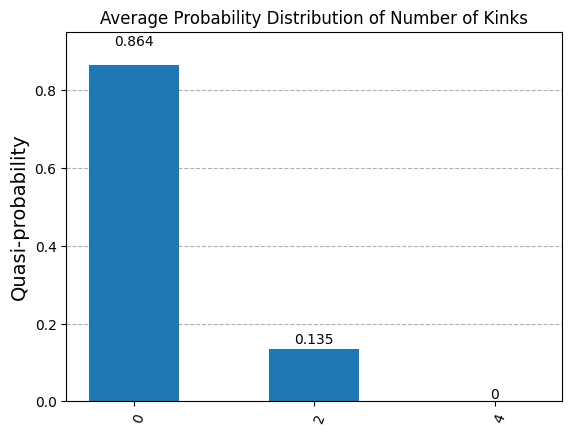

In [14]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, dephazing=0, numruns=500)

## Global interaction noise 

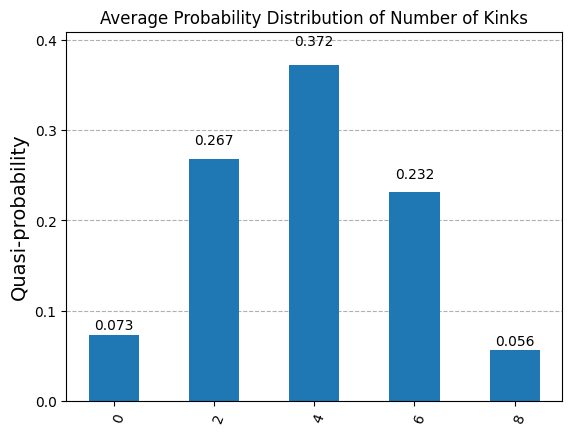

In [3]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, angle_noise=1, numruns=500)

## Global transverse field noise 

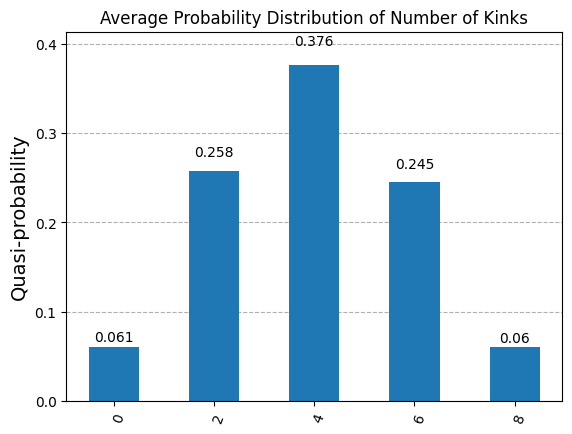

In [6]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, angle_noise=1, numruns=500)

## Local noise in the interaction

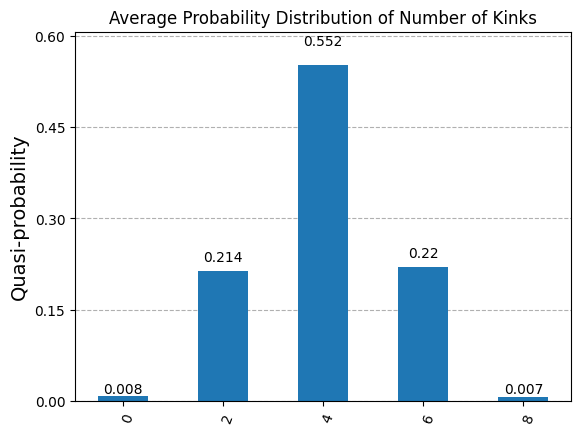

In [3]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, angle_noise=1, numruns=500)

## Local noise in the transverse field

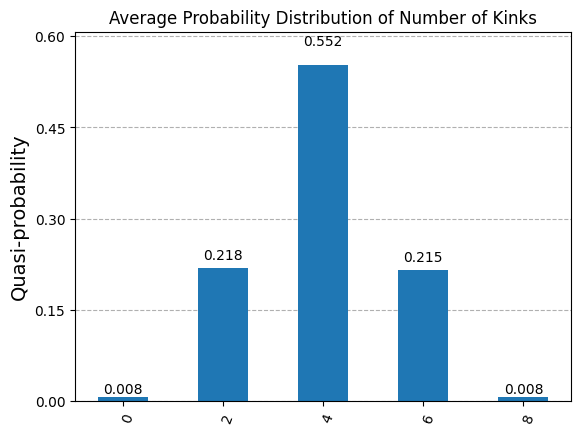

In [4]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, angle_noise=1, numruns=500)

## Global noise in the path (interaction and transverse field)

/tmp/ipykernel_2936916/1083310975.py:52: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


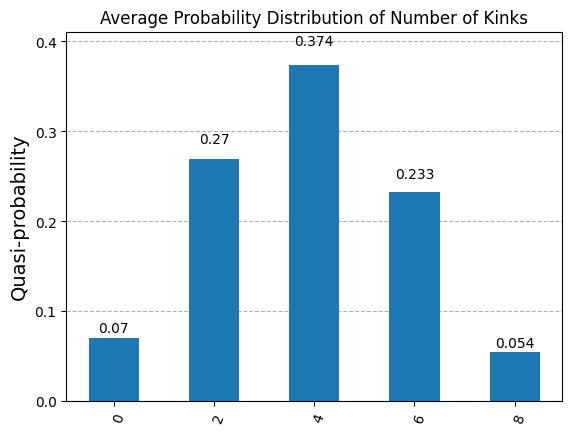

In [21]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, angle_noise=1, numruns=500)

## Global dephazing

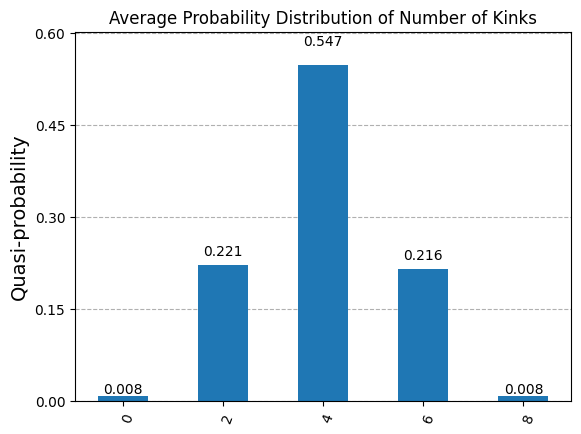

In [5]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, dephazing=0.2, numruns=500)

## Global depolarizing

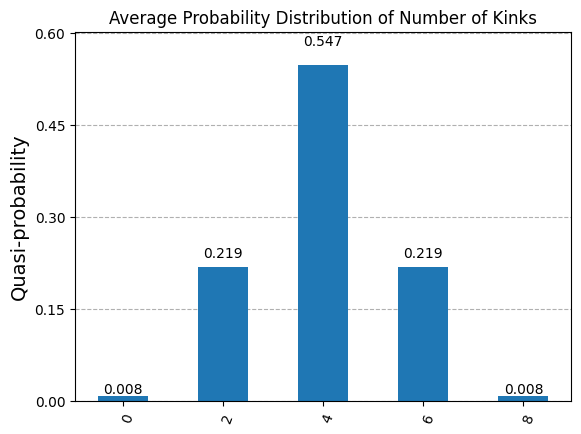

In [6]:
simulate_with_noise_avg(qubits=8, numshots=100, steps=20, depolarizing=0.2, numruns=500)

In [9]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, amplitude_damping_error, phase_damping_error,
    depolarizing_error, thermal_relaxation_error)
from collections import defaultdict
import matplotlib.pyplot as plt

def simulate_with_noise(qubits, numshots, steps, damping=0.0, dephazing=0.0, depolarizing=0.0, angle_noise=0.0):

    # Quantum Circuit
    circuit = QuantumCircuit(qubits, qubits)
    
    # Create the original circuit
    for i in range(qubits):
        circuit.h(i)
    angles = (np.pi/2) * np.array(range(1, steps+1)) / (steps+1)
    for theta in angles:
        theta += angle_noise * np.random.randn()
        alpha = -np.cos(theta)
        beta = -np.sin(theta)
        for i in range(qubits - 1):
            circuit.rz(beta, i)
            circuit.rz(beta, i + 1)
            circuit.cp(-2 * beta, i, i + 1)
        circuit.rz(beta, qubits-1)
        circuit.rz(beta, 0)
        circuit.cp(-2 * beta, qubits-1, 0)
        for i in range(qubits):
            circuit.rx(alpha, i)
    for i in range(qubits):
        circuit.measure(i, i)
        
    # Noise Model
    noise_model = NoiseModel()
    if damping > 0:
        damping_error = amplitude_damping_error(damping)
        noise_model.add_all_qubit_quantum_error(damping_error, ['rx', 'rz'])
    if dephazing > 0:
        dephazing_error = phase_damping_error(dephazing)
        noise_model.add_all_qubit_quantum_error(dephazing_error, ['rx', 'rz'])
    if depolarizing > 0:
        depolarizing_err_1 = depolarizing_error(depolarizing, 1)
        noise_model.add_all_qubit_quantum_error(depolarizing_err_1, ['h','rx', 'rz'])
        depolarizing_err_2 = depolarizing_error(depolarizing, 2)
        noise_model.add_all_qubit_quantum_error(depolarizing_err_2, [ 'cp'])
        
    # Simulation
    simulator = AerSimulator(noise_model=noise_model)
    transpiled_circuits = transpile(circuit, simulator)
    result = simulator.run(transpiled_circuits, shots=numshots).result()
    
    return result.get_counts()

# counts = result.get_counts()

# # Count kinks
# def count_kinks(bitstring):
#     return sum(1 for i in range(len(bitstring)) if bitstring[i] != bitstring[i-1])

# total_kinks = 0
# total_counts = 0
# for bitstring, count in counts.items():
#     total_kinks += count_kinks(bitstring) * count
#     total_counts += count

# mean_kinks = total_kinks / total_counts
# return mean_kinks

def plot_mean_kinks_vs_steps(qubits, numshots, max_steps, damping=0.0, dephazing=0.0, depolarizing=0.0, angle_noise=0.0, numruns=10):
    steps_list = range(0, max_steps + 1)
    mean_kinks_per_qubit = []

    for steps in steps_list:
        total_kinks = 0
        for _ in range(numruns):
            total_kinks += simulate_with_noise(qubits, numshots, steps, damping, dephazing, depolarizing, angle_noise)
        mean_kinks = total_kinks / numruns
        mean_kinks_per_qubit.append(mean_kinks / qubits)
    
    plt.plot(steps_list, mean_kinks_per_qubit, marker='o')
    plt.xlabel('Number of Steps')
    plt.ylabel('Mean Kinks per Qubit')
    plt.title('Mean Kinks per Qubit vs Number of Steps')
    plt.grid(True)
    plt.show()


In [13]:
r = simulate_with_noise(4, 10000, 10)

In [14]:
r.get_counts()

{'1100': 12,
 '1001': 19,
 '0000': 4822,
 '0010': 39,
 '1111': 4878,
 '0001': 22,
 '1110': 30,
 '1101': 28,
 '1011': 27,
 '0011': 14,
 '0111': 26,
 '0110': 17,
 '1000': 39,
 '0100': 26,
 '1010': 1}

## No noise

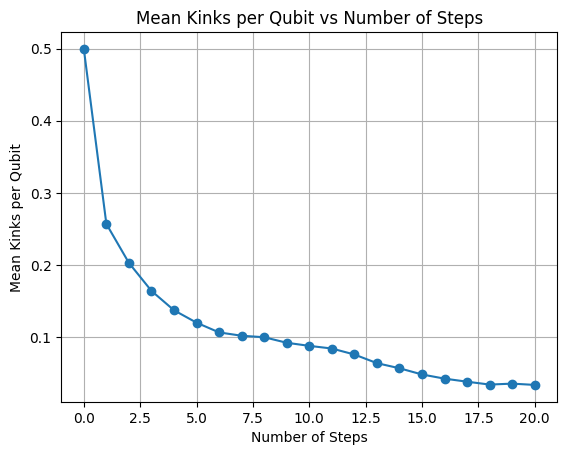

In [8]:
# Example usage
qubits = 8
numshots = 20
max_steps = 20
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0
numruns = 20

plot_mean_kinks_vs_steps(qubits, numshots, max_steps, damping, dephazing, depolarizing, angle_noise, numruns)

## Dephazing

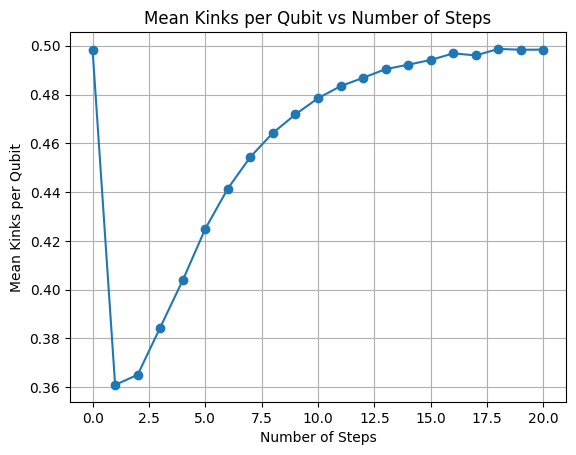

In [3]:
# Example usage
qubits = 8
numshots = 50
max_steps = 20
damping = 0
dephazing = 0.2
depolarizing = 0
angle_noise = 0
numruns = 50

plot_mean_kinks_vs_steps(qubits, numshots, max_steps, damping, dephazing, depolarizing, angle_noise, numruns)

 ## Local noise in the transverse field

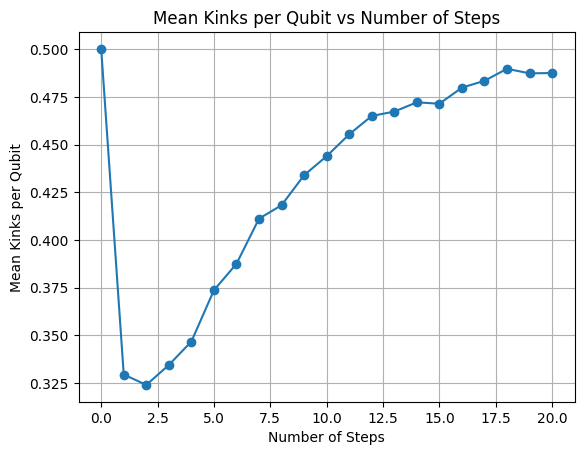

In [36]:
qubits = 8
numshots = 100
max_steps = 20
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0.6
numruns = 200

plot_mean_kinks_vs_steps(qubits, numshots, max_steps, damping, dephazing, depolarizing, angle_noise, numruns)

## global noise in the path

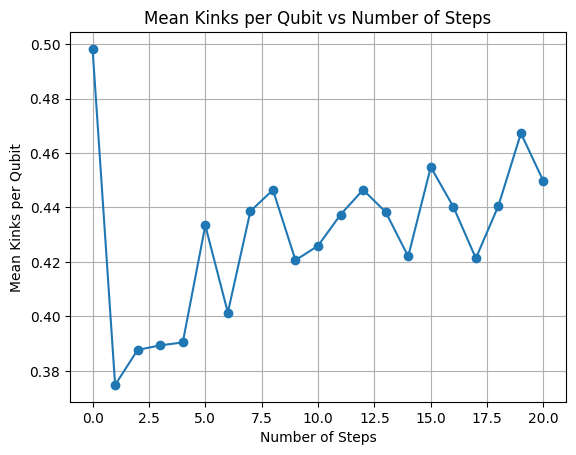

In [32]:
qubits = 8
numshots = 100
max_steps = 20
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0.6
numruns = 200

plot_mean_kinks_vs_steps(qubits, numshots, max_steps, damping, dephazing, depolarizing, angle_noise, numruns)

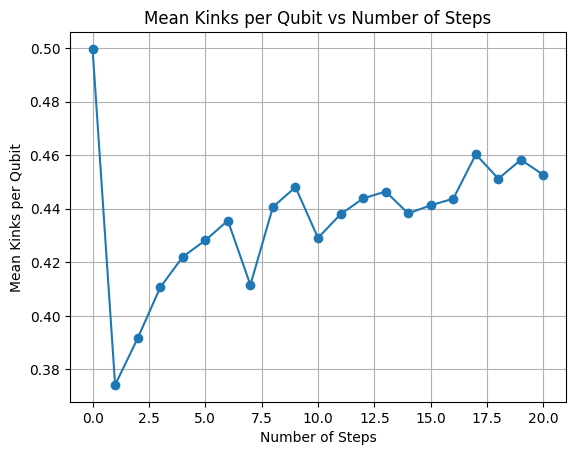

In [38]:
qubits = 8
numshots = 100
max_steps = 20
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0.6
numruns = 200

plot_mean_kinks_vs_steps(qubits, numshots, max_steps, damping, dephazing, depolarizing, angle_noise, numruns)

 ## Local noise in the transverse field

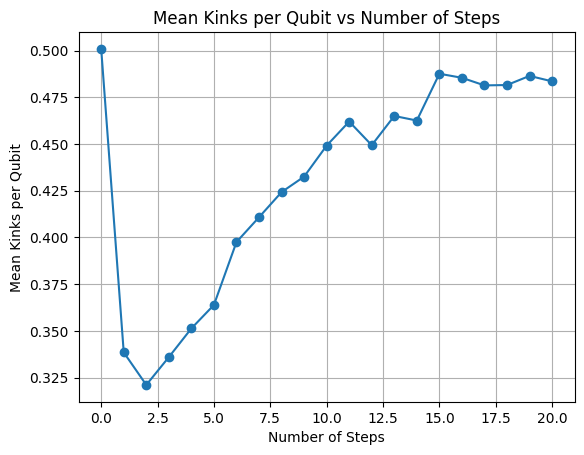

In [35]:
qubits = 8
numshots = 100
max_steps = 20
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0.6
numruns = 100

plot_mean_kinks_vs_steps(qubits, numshots, max_steps, damping, dephazing, depolarizing, angle_noise, numruns)

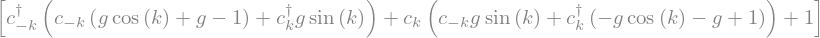

In [8]:
ln_P_tilda_func()

In [4]:
from functions import *

N = 20
tau = 10
w = 0
ks = k_f(N)
pks_numeric = calk_noisy_pk(ks, tau, w)
d_vals = np.arange(0,N+1,2)
num_probability_mass_function = calc_kink_probabilities(pks_numeric, d_vals)
num_probability_mass_function = clean_probabilities(num_probability_mass_function)
num_cumulants = calculate_cumulants(num_probability_mass_function, d_vals)

In [3]:
Dissipator(1, np.array([[0+0j, 0+0j], [0+0j, 1+0j]]), 1)

NameError: name 'Dissipator' is not defined

In [2]:
pks_numeric

array([1.43990401e-01, 7.60193633e-07, 1.47690056e-08, 2.80023192e-06,
       5.84709342e-06, 2.58726812e-06, 4.95862339e-06, 3.06640735e-06,
       1.28718789e-06, 1.51425377e-07])

In [6]:
np.sum(num_probability_mass_function)

0.9999999999729202

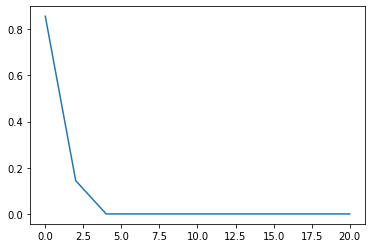

In [7]:
import matplotlib.pyplot as plt
plt.plot(d_vals, num_probability_mass_function)

In [5]:
sum(pks_numeric)

4.999999999999999

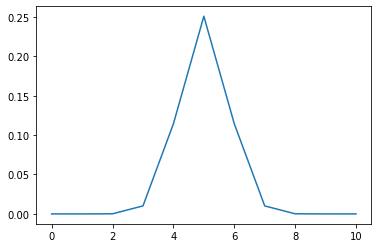

In [24]:
plt.plot(num_probability_mass_function)

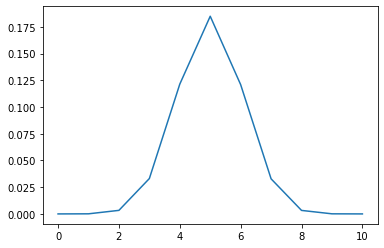

In [29]:
plt.plot(num_probability_mass_function)

In [35]:
kinks = calc_kink_probabilities(np.full(N, 0.5), d_vals)

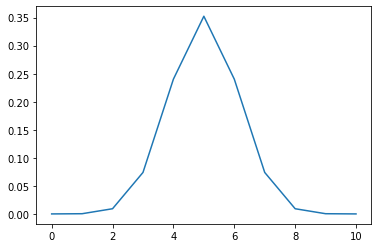

In [36]:
plt.plot(2*kinks)
np.sum(kinks)

In [19]:
rho0 = np.array([[0+0j, 0+0j], [0+0j, 1+0j]])

def g0(t, tau):
    return t/tau

def H0(t, tau, k):
    g_f = g0(t, tau)
    h_z = 2 * (1 - g_f - g_f*np.cos(k))
    h_x = 2 * g_f * np.sin(k)
    H0 = h_z * sigmaz() + h_x * sigmax()
    return H0

def V_func(k):
    v_x = 2 * np.sin(k)
    v_z = -2 * (np.cos(k) + 1)
    V_matrix = v_z * sigmaz() + v_x * sigmax()
    return V_matrix

def Dissipator(k, rho, w):
    V = V_func(k)
    V_dag = V.dag()
    term1 = V * rho * V_dag
    term2 = 0.5 * V_dag * V * rho
    term3 = 0.5 * rho * V_dag * V
    D = w**2 * (term1 - term2 - term3)
    return D

def rho_dt(t, tau, k, w, rho):
    H = H0(t, tau, k)
    D = Dissipator(k, rho, w)
    U = -1j * commutator(H, rho)
    rho_dot = U + D
    return rho_dot




In [3]:
from qutip import mesolve, Qobj, sigmax, sigmaz
import numpy as np

# Define necessary functions
def g0(t, tau):
    return t / tau

def H0_coeff(t, args):
    tau = args['tau']
    k = args['k']
    g_f = g0(t, tau)
    h_z = 2 * (1 - g_f - g_f * np.cos(k))
    h_x = 2 * g_f * np.sin(k)
    return [h_z, h_x]

def H0(t, args):
    h_z, h_x = H0_coeff(t, args)
    return h_z * sigmaz() + h_x * sigmax()

# Define V_func as before
def V_func(k):
    v_x = 2 * np.sin(k)
    v_z = -2 * (np.cos(k) + 1)
    V_matrix = v_z * sigmaz() + v_x * sigmax()
    return V_matrix

# Define the initial state and time points
rho0 = Qobj([[0+0j, 0+0j], [0+0j, 1+0j]])
times = np.linspace(0, 10, 100)

# Define collapse operators
c_ops = [np.sqrt(w) * V_func(k)]  # Make sure this returns a Qobj

# Time-dependent Hamiltonian for mesolve
H_td = [[sigmaz(), lambda t, args: H0_coeff(t, args)[0]], 
        [sigmax(), lambda t, args: H0_coeff(t, args)[1]]]

# Run the simulation
result = mesolve(H_td, rho0, times, c_ops, args={'tau': tau, 'k': k})

# Accessing the results
rho_t = result.states


In [4]:
import numpy as np
from qutip import Qobj  # Make sure to import Qobj from QuTiP

# Define the parameter 'k'.
# Replace this with the actual value you are using.
k_value = np.pi  # Example value; replace with your actual value of k

# Define the eigenvector G (normalized already).
G = np.array([np.sin(k_value / 2), np.cos(k_value / 2)])

# Assuming Q_qobj is your density matrix from the QuTiP simulation as a Qobj.
# You need to replace this with the actual Qobj from your simulation results.
# Example:
# Q_qobj = Qobj([[0.1, 0.2], [0.2, 0.7]], dims=[[2], [2]])
Q_qobj = your_density_matrix_qobj  # Replace with your actual Qobj data

# Convert the Qobj density matrix to a NumPy array
Q = Q_qobj.full()  # Use .full() for QuTiP version 4.x or .to_array() for QuTiP version 5.x

# Calculate G^dagger (the conjugate transpose of G).
G_dagger = np.conjugate(G.T)

# Perform the matrix multiplication G^dagger Q G.
result = G_dagger.dot(Q).dot(G)

# Output the result.
print("The result of G^dagger Q G is:", result)


[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.20128905-1.93177669e-19j 0.19601222-3.00466081e-02j]
  [0.19601222+3.00466081e-02j 0.79871095+1.93177669e-19j]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.24675219-1.43632372e-18j 0.22455013-5.01141392e-02j]
  [0.22455013+5.01141392e-02j 0.75324781+1.43632372e-18j]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.26418928+4.22837532e-22j 0.22048371-5.48007047e-02j]
  [0.22048371+5.48007047e-02j 0.73581072-4.22837532e-22j]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.27670848-6.13914311e-18j 0.21092225-5.40688718e-02j]
  [0.21092225+5.40688718e-02j 0.72329152+6.13914311e-18j]],
 Quantum object: dims = [[2], [2]], shape = (2

## 23/06/24

In [1]:
import numpy as np
import time
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel
from qiskit_aer import AerSimulator
from collections import defaultdict
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer.noise.errors import amplitude_damping_error, phase_damping_error, depolarizing_error

def generate_tfim_circuits(qubits, steps_list, num_circuits_per_step, angle_noise=0.0):
    start_time = time.time()
    
    circuits = []
    for steps in steps_list:
        base_angles = (np.pi/2) * np.arange(1, steps+1) / (steps+1)
        alphas = -np.cos(base_angles)
        betas = -np.sin(base_angles)
        
        noisy_alphas = np.outer(alphas, np.ones(num_circuits_per_step)) + angle_noise * np.random.randn(steps, num_circuits_per_step)
        
        for circuit_idx in range(num_circuits_per_step):
            circuit = QuantumCircuit(qubits, qubits)
            circuit.h(range(qubits))
            
            for step in range(steps):
                beta = betas[step]
                circuit.rz(beta, range(qubits))
                
                for i in range(qubits):
                    j = (i + 1) % qubits
                    circuit.cp(-2 * beta, i, j)
                    circuit.rx(noisy_alphas[step, circuit_idx], i)

            circuit.measure(range(qubits), range(qubits))
            circuits.append(circuit)
    
    print("Circuit generation time: {:.4f} seconds".format(time.time() - start_time))
    return circuits

def simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping=0.0, dephazing=0.0, depolarizing=0.0, angle_noise=0.0):
    circuits = generate_tfim_circuits(qubits, steps_list, num_circuits_per_step, angle_noise)

    start_time = time.time()
    # Noise Model
    noise_model = NoiseModel()
    if damping > 0:
        noise_model.add_all_qubit_quantum_error(amplitude_damping_error(damping), ['rx', 'rz'])
    if dephazing > 0:
        noise_model.add_all_qubit_quantum_error(phase_damping_error(dephazing), ['rx', 'rz'])
    if depolarizing > 0:
        noise_model.add_all_qubit_quantum_error(depolarizing_error(depolarizing, 1), ['h', 'rx', 'rz'])
        noise_model.add_all_qubit_quantum_error(depolarizing_error(depolarizing, 2), ['cp'])
    print("Noise model setup time: {:.4f} seconds".format(time.time() - start_time))
    
    start_time = time.time()
    # Simulation
    simulator = AerSimulator(noise_model=noise_model)
    transpiled_circuits = transpile(circuits, simulator)
    print("Transpilation time: {:.4f} seconds".format(time.time() - start_time))
    
    start_time = time.time()
    results = simulator.run(transpiled_circuits, shots=numshots).result().get_counts()
    print("Simulation time: {:.4f} seconds".format(time.time() - start_time))
    
    # Ensure results is a list even if it's a single dictionary
    if isinstance(results, dict):
        results = [results]
    
    # Aggregation of results by number of steps
    start_time = time.time()
    counts_by_steps = {steps: defaultdict(int) for steps in steps_list}
    circuit_index = 0
    for steps in steps_list:
        for _ in range(num_circuits_per_step):
            for key, value in results[circuit_index].items():
                counts_by_steps[steps][key] += value
            circuit_index += 1
    print("Results aggregation time: {:.4f} seconds".format(time.time() - start_time))
    
    # Convert defaultdict to dict
    counts_by_steps = {steps: dict(counts) for steps, counts in counts_by_steps.items()}
    
    return counts_by_steps

def count_kinks(bitstring):
    return sum(1 for i in range(len(bitstring)) if bitstring[i] != bitstring[i-1])

def calc_kinks_probability(counts):
    kinks_count = defaultdict(int)
    for bitstring, count in counts.items():
        kinks_count[count_kinks(bitstring)] += count

    # Normalize the counts to get probabilities
    numshots = sum(kinks_count.values())
    kinks_probability = {k: v/numshots for k, v in kinks_count.items()}
    return kinks_probability

def calc_kinks_mean(kinks_probability):
    total_kinks = sum(k * v for k, v in kinks_probability.items())
    return total_kinks

def calc_kinks_variance(kinks_probability):
    mean_kinks = calc_kinks_mean(kinks_probability)
    total_variance = sum((k - mean_kinks)**2 * v for k, v in kinks_probability.items())
    return total_variance


In [11]:
## 13.10.24
qubits = 20
steps_list = [i for i in range(0, 26)]
num_circuits_per_step = 1
numshots = 100000
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results1720 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 0.3423 seconds
Noise model setup time: 0.0000 seconds
Transpilation time: 1.5813 seconds
Simulation time: 6.5407 seconds
Results aggregation time: 0.0583 seconds


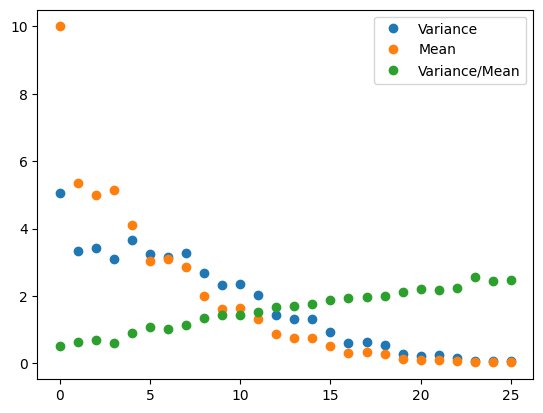

In [12]:
# plot the variance/mean ratio for each step, add title and labels
probs = {s: calc_kinks_probability(d) for s, d in results1720.items()}
means =  {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs.items()}
plt.plot(variances.keys(), variances.values(), 'o', label='Variance')
plt.plot(means.keys(), means.values(), 'o', label='Mean') 
plt.plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
plt.legend()

In [6]:
## 13.10.24
qubits = 20
steps_list = [i for i in range(0, 41)]
num_circuits_per_step = 10
numshots = 10
damping = 0
dephazing = 0.01
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results2028 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 8.6206 seconds
Noise model setup time: 0.0024 seconds
Transpilation time: 11.7121 seconds
Simulation time: 3072.2793 seconds
Results aggregation time: 0.0009 seconds


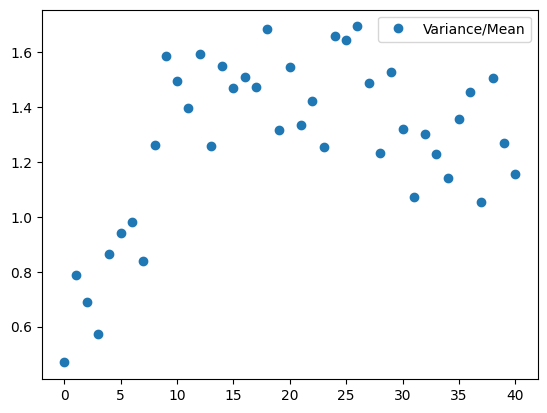

In [7]:
# plot the variance/mean ratio for each step, add title and labels
probs = {s: calc_kinks_probability(d) for s, d in results2028.items()}
means =  {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs.items()}
#plt.plot(variances.keys(), variances.values(), 'o', label='Variance')
#plt.plot(means.keys(), means.values(), 'o', label='Mean')
plt.plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
plt.legend()

Circuit generation time: 5.5906 seconds
Noise model setup time: 0.0034 seconds
Transpilation time: 7.3809 seconds
Simulation time: 114.5292 seconds
Results aggregation time: 0.0313 seconds


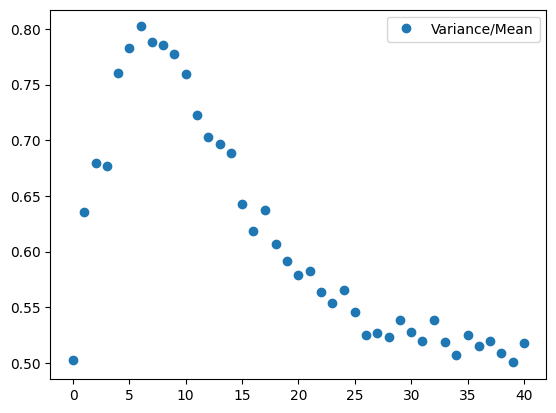

In [16]:
## 13.10.24
qubits = 10
steps_list = [i for i in range(0, 41)]
num_circuits_per_step = 10
numshots = 700
damping = 0
dephazing = 0.09
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results2231 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

# plot the variance/mean ratio for each step, add title and labels
probs = {s: calc_kinks_probability(d) for s, d in results2231.items()}
means =  {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs.items()}
#plt.plot(variances.keys(), variances.values(), 'o', label='Variance')
#plt.plot(means.keys(), means.values(), 'o', label='Mean')
plt.plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
plt.legend()

Circuit generation time: 5.2839 seconds
Noise model setup time: 0.0000 seconds
Transpilation time: 8.7076 seconds
Simulation time: 15.3325 seconds
Results aggregation time: 0.0016 seconds


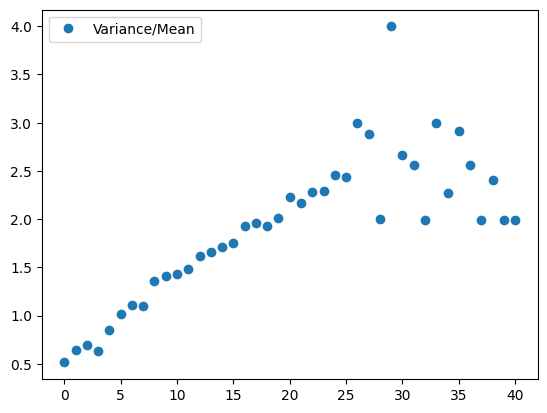

In [12]:
## 13.10.24
qubits = 10
steps_list = [i for i in range(0, 41)]
num_circuits_per_step = 10
numshots = 200
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results2231 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

# plot the variance/mean ratio for each step, add title and labels
probs = {s: calc_kinks_probability(d) for s, d in results2231.items()}
means =  {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs.items()}
#plt.plot(variances.keys(), variances.values(), 'o', label='Variance')
#plt.plot(means.keys(), means.values(), 'o', label='Mean')
plt.plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
plt.legend()

## 23/06/24

In [75]:
qubits = 4
steps_list = [i for i in range(0, 41)]
num_circuits_per_step = 100
numshots = 500
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0.8

# Generate and simulate the TFIM circuits
results1715 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 26.6774 seconds
Noise model setup time: 0.0000 seconds
Transpilation time: 41.8654 seconds
Simulation time: 96.8520 seconds
Results aggregation time: 0.0119 seconds


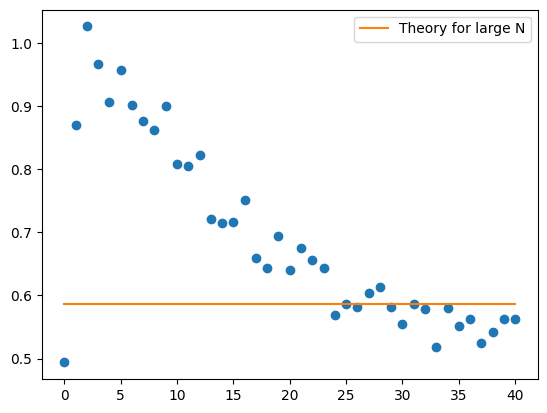

In [76]:
# plot the variance/mean ratio for each step, add title and labels
probs1715 = {s: calc_kinks_probability(d) for s, d in results1715.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs1715.items()}
plt.plot(ratios.keys(), ratios.values(), 'o')
plt.plot(ratios.keys(), [2 - 2**0.5]*len(ratios), label='Theory for large N')

plt.legend()

In [45]:
qubits = 20
steps_list = [i for i in range(0, 31)]
num_circuits_per_step = 50
numshots = 1024
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0.4

# Generate and simulate the TFIM circuits
results1630 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 28.6340 seconds
Noise model setup time: 0.0000 seconds
Simulation time: 2387.6019 seconds
Results aggregation time: 0.3743 seconds


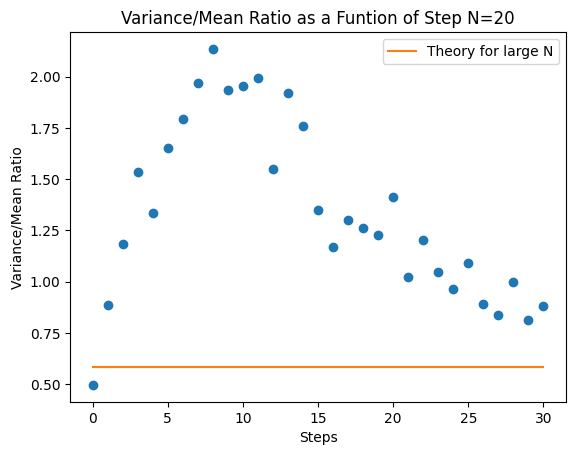

In [50]:
# plot the variance/mean ratio for each step, add title and labels
probs1630 = {s: calc_kinks_probability(d) for s, d in results1630.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs1630.items()}
plt.plot(ratios.keys(), ratios.values(), 'o')
plt.plot(ratios.keys(), [2 - 2**0.5]*len(ratios), label='Theory for large N')
plt.title("Variance/Mean Ratio as a Funtion of Step N=20")
plt.xlabel("Steps")
plt.ylabel("Variance/Mean Ratio")
plt.legend()

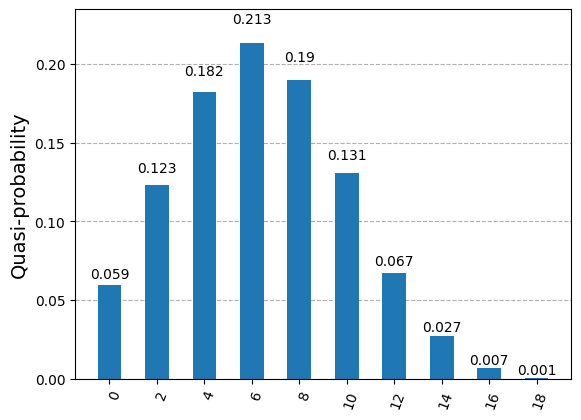

In [47]:
plot_histogram(calc_kinks_probability(results1630[10]))

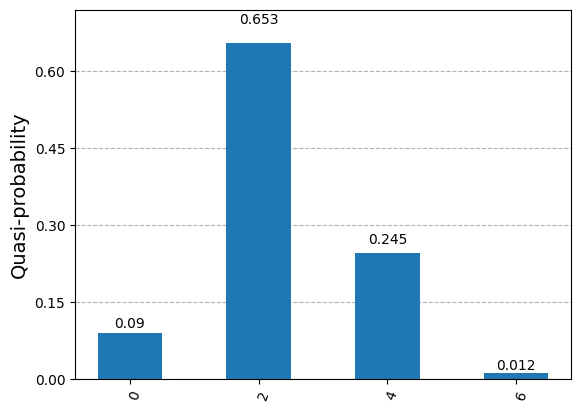

In [18]:
no_noise = simulate_tfim(5, 1024, 5, angle_noise=0)
p = calc_kinks_probability(no_noise)
plot_histogram(p)

In [24]:
calc_kinks_variance(p)/calc_kinks_mean(p)

0.5936966005592378

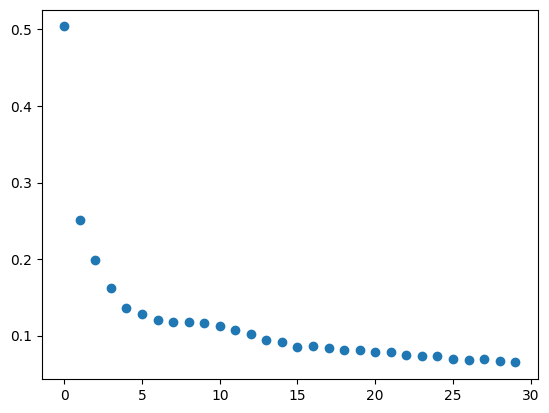

In [79]:
## plot the mean for new data (now a dictionary of kinks probabilities and steps) as dots 
means = {s: calc_kinks_mean(d)/30 for s, d in new_data.items()}
plt.plot(means.keys(), means.values(), 'o')

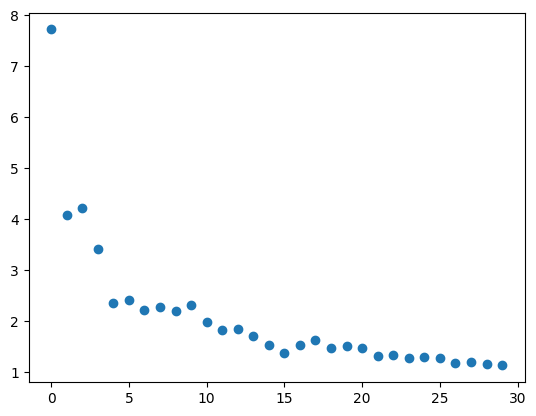

In [80]:
## plot the variances for new data (now a dictionary of kinks probabilities and steps) as dots 
variances = {s: calc_kinks_variance(d) for s, d in new_data.items()}
plt.plot(variances.keys(), variances.values(), 'o')

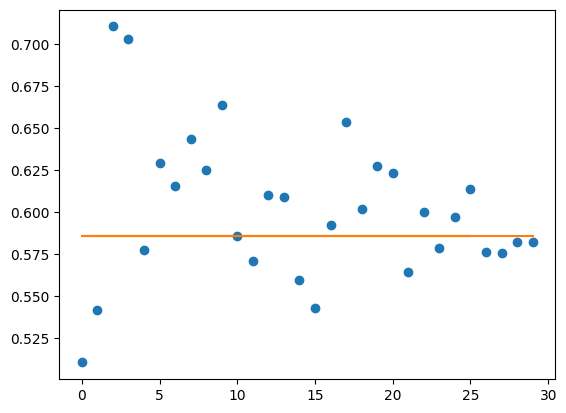

In [82]:
# plot the variance/mean ratio for each step
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in new_data.items()}
plt.plot(ratios.keys(), ratios.values(), 'o')
plt.plot(ratios.keys(), [2 - 2**0.5]*30)

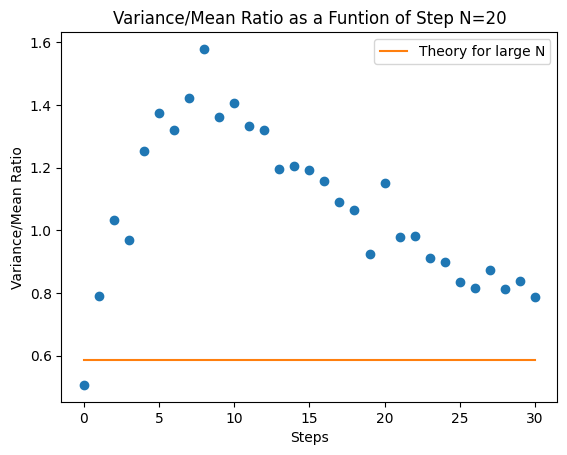

In [22]:
# plot the variance/mean ratio for each step, add title and labels
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in circuits100.items()}
plt.plot(ratios.keys(), ratios.values(), 'o')
plt.plot(ratios.keys(), [2 - 2**0.5]*len(ratios), label='Theory for large N')
plt.title("Variance/Mean Ratio as a Funtion of Step N=20")
plt.xlabel("Steps")
plt.ylabel("Variance/Mean Ratio")
plt.legend()

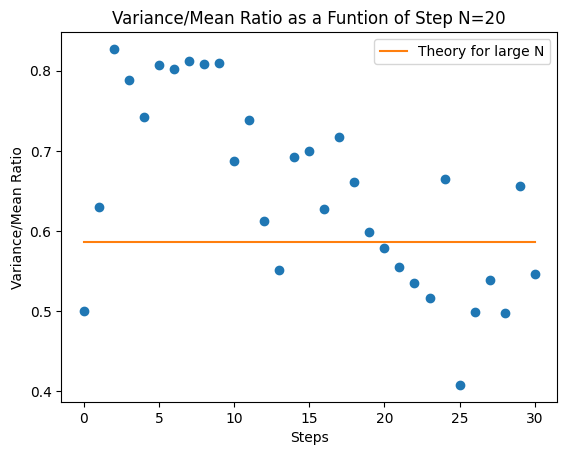

In [ ]:
# plot the variance/mean ratio for each step, add title and labels
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in data20_noisy.items()}
plt.plot(ratios.keys(), ratios.values(), 'o')
plt.plot(ratios.keys(), [2 - 2**0.5]*len(ratios), label='Theory for large N')
plt.title("Variance/Mean Ratio as a Funtion of Step N=20")
plt.xlabel("Steps")
plt.ylabel("Variance/Mean Ratio")
plt.legend()

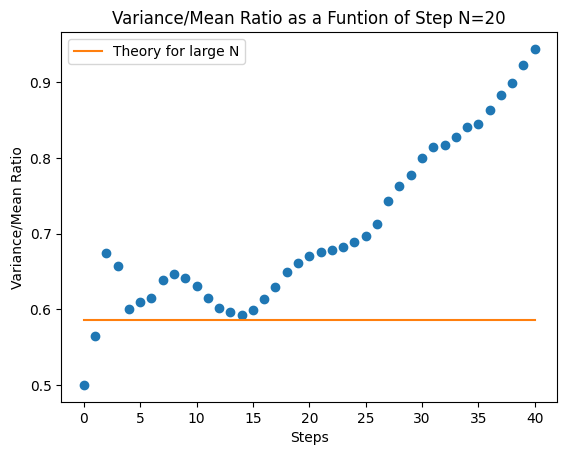

In [19]:
# plot the variance/mean ratio for each step, add title and labels
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in data20.items()}
plt.plot(ratios.keys(), ratios.values(), 'o')
plt.plot(ratios.keys(), [2 - 2**0.5]*len(ratios), label='Theory for large N')
plt.title("Variance/Mean Ratio as a Funtion of Step N=20")
plt.xlabel("Steps")
plt.ylabel("Variance/Mean Ratio")
plt.legend()

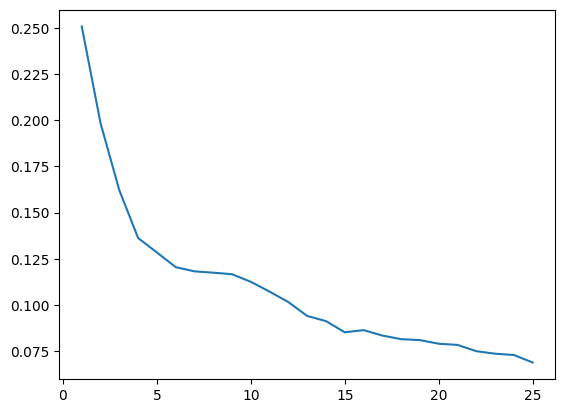

In [37]:
## plot the mean kinks for each step
means = [calc_kinks_mean(calc_kinks_probability(d))/30 for d in data]
plt.plot(range(1, 26), means)

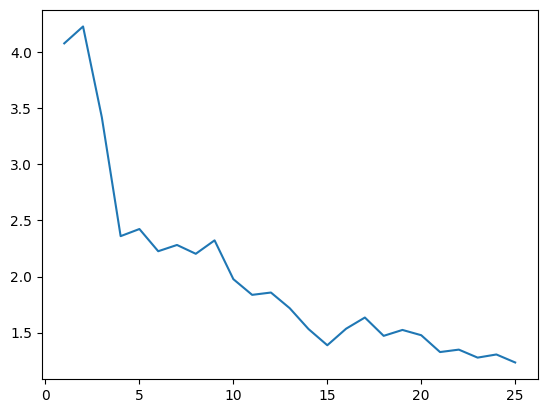

In [51]:
## plot the variance for each step
variances = [calc_kinks_variance(calc_kinks_probability(d)) for d in data]
plt.plot(range(1, 26), variances)

In [84]:
from qiskit.quantum_info import DensityMatrix
from qiskit import QuantumCircuit
import numpy as np

qubits = 4
steps = 200
num_circuits = 500 # Number of noisy circuits to average over
angle_noise = 10    # Set a non-zero angle noise

# Prepare an empty list to collect density matrices
density_matrices = []
density_matrices_datas = []

for _ in range(num_circuits):
    circuit = QuantumCircuit(qubits)
    circuit.h(range(qubits))
    
    base_angles = (np.pi / 2) * np.arange(1, steps + 1) / (steps + 1)
    betas = -np.sin(base_angles)
    
    # Add noise to base angles
    noisy_base_angles = base_angles + angle_noise * np.random.randn(steps)
    noisy_alphas = -np.cos(noisy_base_angles)
    
    for step in range(steps):
        beta = betas[step]
        circuit.rz(beta, range(qubits))
        
        for i in range(qubits):
            j = (i + 1) % qubits
            circuit.cp(-2 * beta, i, j)
            circuit.rx(noisy_alphas[step], i)
    
    # Compute the density matrix for this circuit
    dm = DensityMatrix.from_instruction(circuit)
    density_matrices.append(dm)
    density_matrices_datas.append(dm.data)

# Average the density matrices
avg_density_matrix = sum(density_matrices_datas) / num_circuits
rho2 = avg_density_matrix @ avg_density_matrix
# Compute the purity of the averaged density matrix
purity = rho2.trace()
print(purity.real)

0.06473956003948833


In [ ]:
from qiskit.quantum_info import DensityMatrix
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

qubits = 4
num_circuits = 100  # Number of noisy circuits to average over

# -----------------------------------------------
# 1. Plot Purity as a Function of Steps
# -----------------------------------------------

step_values = np.arange(1, 51, 5)  # Different values for steps, e.g., from 1 to 50 in increments of 5
angle_noise = 0.1  # Set a constant noise level
purities_steps = []

for steps in step_values:
    density_matrices = []

    for _ in range(num_circuits):
        circuit = QuantumCircuit(qubits)
        circuit.h(range(qubits))
        
        base_angles = (np.pi / 2) * np.arange(1, steps + 1) / (steps + 1)
        betas = -np.sin(base_angles)
        
        noisy_base_angles = base_angles + angle_noise * np.random.randn(steps)
        noisy_alphas = -np.cos(noisy_base_angles)
        
        for step in range(steps):
            beta = betas[step]
            circuit.rz(beta, range(qubits))
            
            for i in range(qubits):
                j = (i + 1) % qubits
                circuit.cp(-2 * beta, i, j)
                circuit.rx(noisy_alphas[step], i)
        
        # Compute the density matrix for this circuit
        dm = DensityMatrix.from_instruction(circuit)
        density_matrices.append(dm.data)
    
    # Average the density matrices
    avg_density_matrix = sum(density_matrices) / num_circuits
    rho_squared = avg_density_matrix @ avg_density_matrix
    purity = np.trace(rho_squared).real
    purities_steps.append(purity)

# Plot purity as a function of steps
plt.figure(figsize=(10, 5))
plt.plot(step_values, purities_steps, marker='o')
plt.xlabel('Number of Steps')
plt.ylabel('Purity')
plt.title('Purity as a Function of Steps')
plt.grid(True)
plt.show()

# -----------------------------------------------
# 2. Plot Purity as a Function of Noise
# -----------------------------------------------

steps = 20  # Set a constant number of steps
noise_values = np.linspace(0, 2, 10)  # Different values for noise level
purities_noise = []

for angle_noise in noise_values:
    density_matrices = []

    for _ in range(num_circuits):
        circuit = QuantumCircuit(qubits)
        circuit.h(range(qubits))
        
        base_angles = (np.pi / 2) * np.arange(1, steps + 1) / (steps + 1)
        betas = -np.sin(base_angles)
        
        noisy_base_angles = base_angles + angle_noise * np.random.randn(steps)
        noisy_alphas = -np.cos(noisy_base_angles)
        
        for step in range(steps):
            beta = betas[step]
            circuit.rz(beta, range(qubits))
            
            for i in range(qubits):
                j = (i + 1) % qubits
                circuit.cp(-2 * beta, i, j)
                circuit.rx(noisy_alphas[step], i)
        
        # Compute the density matrix for this circuit
        dm = DensityMatrix.from_instruction(circuit)
        density_matrices.append(dm.data)
    
    # Average the density matrices
    avg_density_matrix = sum(density_matrices) / num_circuits
    rho_squared = avg_density_matrix @ avg_density_matrix
    purity = np.trace(rho_squared).real
    purities_noise.append(purity)

# Plot purity as a function of noise level
plt.figure(figsize=(10, 5))
plt.plot(noise_values, purities_noise, marker='o', color='r')
plt.xlabel('Noise Level')
plt.ylabel('Purity')
plt.title('Purity as a Function of Noise Level')
plt.grid(True)
plt.show()


0.0625

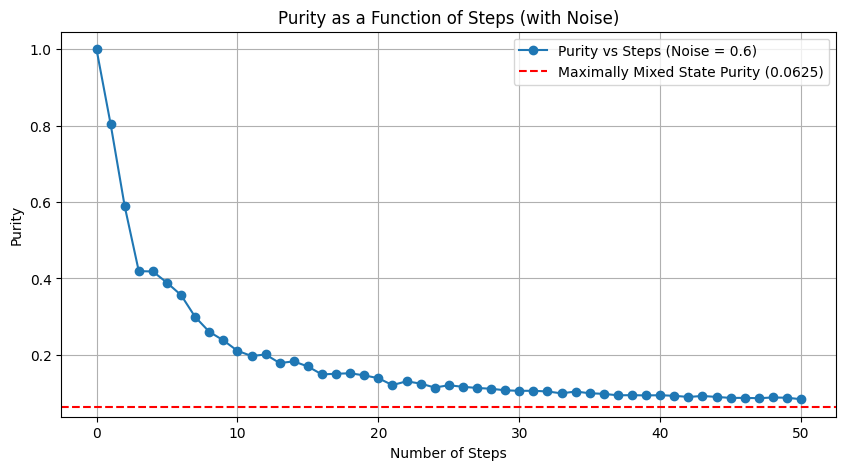

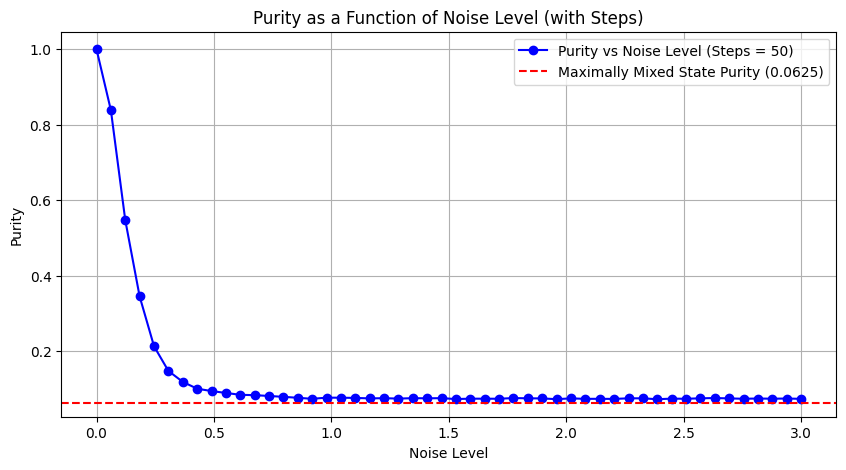

In [ ]:
from qiskit.quantum_info import DensityMatrix
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

qubits = 4
num_circuits = 100  # Number of noisy circuits to average over
max_mixed_purity = 1 / (2 ** qubits)  # Purity of the maximally mixed state

# -----------------------------------------------
# 1. Plot Purity as a Function of Steps
# -----------------------------------------------

step_values = np.arange(0, 51)  # Different values for steps, e.g., from 1 to 50 in increments of 5
angle_noise = 0.6  # Set a constant noise level
purities_steps = []

for steps in step_values:
    density_matrices = []

    for _ in range(num_circuits):
        circuit = QuantumCircuit(qubits)
        circuit.h(range(qubits))
        
        base_angles = (np.pi / 2) * np.arange(1, steps + 1) / (steps + 1)
        betas = -np.sin(base_angles)
        
        noisy_base_angles = base_angles + angle_noise * np.random.randn(steps)
        noisy_alphas = -np.cos(noisy_base_angles)
        
        for step in range(steps):
            beta = betas[step]
            circuit.rz(beta, range(qubits))
            
            for i in range(qubits):
                j = (i + 1) % qubits
                circuit.cp(-2 * beta, i, j)
                circuit.rx(noisy_alphas[step], i)
        
        # Compute the density matrix for this circuit
        dm = DensityMatrix.from_instruction(circuit)
        density_matrices.append(dm.data)
    
    # Average the density matrices
    avg_density_matrix = sum(density_matrices) / num_circuits
    rho_squared = avg_density_matrix @ avg_density_matrix
    purity = np.trace(rho_squared).real
    purities_steps.append(purity)

# Plot purity as a function of steps
plt.figure(figsize=(10, 5))
plt.plot(step_values, purities_steps, marker='o', label=f'Purity vs Steps (Noise = {angle_noise})')
plt.axhline(y=max_mixed_purity, color='r', linestyle='--', label='Maximally Mixed State Purity (0.0625)')
plt.xlabel('Number of Steps')
plt.ylabel('Purity')
plt.title('Purity as a Function of Steps (with Noise)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------
# 2. Plot Purity as a Function of Noise
# -----------------------------------------------

steps = 25  # Set a constant number of steps
noise_values = np.linspace(0, 2, 50)  # Different values for noise level
purities_noise = []

for angle_noise in noise_values:
    density_matrices = []

    for _ in range(num_circuits):
        circuit = QuantumCircuit(qubits)
        circuit.h(range(qubits))
        
        base_angles = (np.pi / 2) * np.arange(1, steps + 1) / (steps + 1)
        betas = -np.sin(base_angles)
        
        noisy_base_angles = base_angles + angle_noise * np.random.randn(steps)
        noisy_alphas = -np.cos(noisy_base_angles)
        
        for step in range(steps):
            beta = betas[step]
            circuit.rz(beta, range(qubits))
            
            for i in range(qubits):
                j = (i + 1) % qubits
                circuit.cp(-2 * beta, i, j)
                circuit.rx(noisy_alphas[step], i)
        
        # Compute the density matrix for this circuit
        dm = DensityMatrix.from_instruction(circuit)
        density_matrices.append(dm.data)
    
    # Average the density matrices
    avg_density_matrix = sum(density_matrices) / num_circuits
    rho_squared = avg_density_matrix @ avg_density_matrix
    purity = np.trace(rho_squared).real
    purities_noise.append(purity)

# Plot purity as a function of noise level
plt.figure(figsize=(10, 5))
plt.plot(noise_values, purities_noise, marker='o', color='b', label=f'Purity vs Noise Level (Steps = {steps})')
plt.axhline(y=max_mixed_purity, color='r', linestyle='--', label='Maximally Mixed State Purity (0.0625)')
plt.xlabel('Noise Level')
plt.ylabel('Purity')
plt.title('Purity as a Function of Noise Level (with Steps)')
plt.legend()
plt.grid(True)
plt.show()


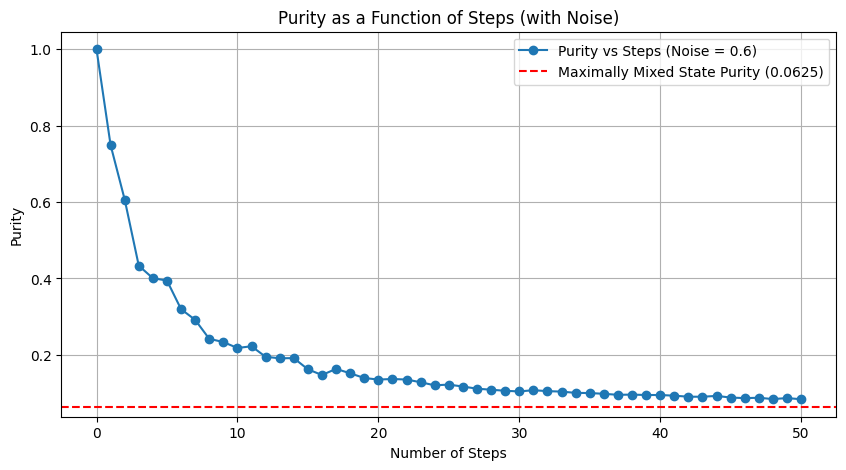

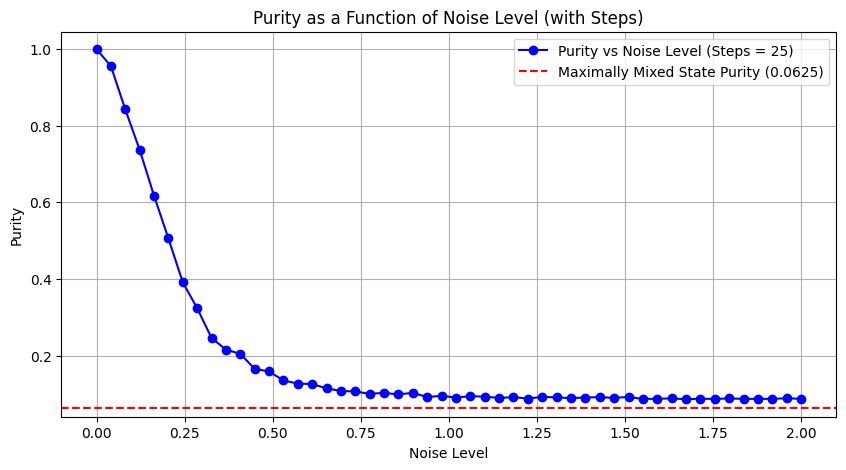

In [89]:
from qiskit.quantum_info import DensityMatrix
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

qubits = 4
num_circuits = 100  # Number of noisy circuits to average over
max_mixed_purity = 1 / (2 ** qubits)  # Purity of the maximally mixed state

# -----------------------------------------------
# 1. Plot Purity as a Function of Steps
# -----------------------------------------------

step_values = np.arange(0, 51)  # Different values for steps, e.g., from 1 to 50 in increments of 5
angle_noise = 0.6  # Set a constant noise level
purities_steps = []

for steps in step_values:
    density_matrices = []

    for _ in range(num_circuits):
        circuit = QuantumCircuit(qubits)
        circuit.h(range(qubits))
        
        base_angles = (np.pi / 2) * np.arange(1, steps + 1) / (steps + 1)
        betas = -np.sin(base_angles)
        
        noisy_base_angles = base_angles + angle_noise * np.random.randn(steps)
        noisy_alphas = -np.cos(noisy_base_angles)
        
        for step in range(steps):
            beta = betas[step]
            circuit.rz(beta, range(qubits))
            
            for i in range(qubits):
                j = (i + 1) % qubits
                circuit.cp(-2 * beta, i, j)
                circuit.rx(noisy_alphas[step], i)
        
        # Compute the density matrix for this circuit
        dm = DensityMatrix.from_instruction(circuit)
        density_matrices.append(dm.data)
    
    # Average the density matrices
    avg_density_matrix = sum(density_matrices) / num_circuits
    rho_squared = avg_density_matrix @ avg_density_matrix
    purity = np.trace(rho_squared).real
    purities_steps.append(purity)

# Plot purity as a function of steps
plt.figure(figsize=(10, 5))
plt.plot(step_values, purities_steps, marker='o', label=f'Purity vs Steps (Noise = {angle_noise})')
plt.axhline(y=max_mixed_purity, color='r', linestyle='--', label='Maximally Mixed State Purity (0.0625)')
plt.xlabel('Number of Steps')
plt.ylabel('Purity')
plt.title('Purity as a Function of Steps (with Noise)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------
# 2. Plot Purity as a Function of Noise
# -----------------------------------------------

steps = 25  # Set a constant number of steps
noise_values = np.linspace(0, 2, 50)  # Different values for noise level
purities_noise = []

for angle_noise in noise_values:
    density_matrices = []

    for _ in range(num_circuits):
        circuit = QuantumCircuit(qubits)
        circuit.h(range(qubits))
        
        base_angles = (np.pi / 2) * np.arange(1, steps + 1) / (steps + 1)
        betas = -np.sin(base_angles)
        
        noisy_base_angles = base_angles + angle_noise * np.random.randn(steps)
        noisy_alphas = -np.cos(noisy_base_angles)
        
        for step in range(steps):
            beta = betas[step]
            circuit.rz(beta, range(qubits))
            
            for i in range(qubits):
                j = (i + 1) % qubits
                circuit.cp(-2 * beta, i, j)
                circuit.rx(noisy_alphas[step], i)
        
        # Compute the density matrix for this circuit
        dm = DensityMatrix.from_instruction(circuit)
        density_matrices.append(dm.data)
    
    # Average the density matrices
    avg_density_matrix = sum(density_matrices) / num_circuits
    rho_squared = avg_density_matrix @ avg_density_matrix
    purity = np.trace(rho_squared).real
    purities_noise.append(purity)

# Plot purity as a function of noise level
plt.figure(figsize=(10, 5))
plt.plot(noise_values, purities_noise, marker='o', color='b', label=f'Purity vs Noise Level (Steps = {steps})')
plt.axhline(y=max_mixed_purity, color='r', linestyle='--', label='Maximally Mixed State Purity (0.0625)')
plt.xlabel('Noise Level')
plt.ylabel('Purity')
plt.title('Purity as a Function of Noise Level (with Steps)')
plt.legend()
plt.grid(True)
plt.show()
